## Case Study of Instacart Dataset 2017 as a part of Hertz interview

###### “The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on <date>

In [21]:
# importing data cleaning and Analysing libraries
import zipfile
import glob
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Unzipping data folder
with zipfile.ZipFile("instacart-market-basket-analysis.zip","r") as zip_ref:
    zip_ref.extractall('data/')
    
## Unzipping data files in to data folder
for file in glob.iglob('data/*.zip'):
    with zipfile.ZipFile(file,"r") as zip_ref:
        zip_ref.extractall('data/')

In [13]:
#checking extracted files
for file in glob.iglob('data/*.csv'):
    print(file[5:-4])

aisles
departments
orders
order_products__prior
order_products__train
products
sample_submission


In [11]:
# reading files
aisles=pd.read_csv('data/aisles.csv')
departments=pd.read_csv('data/departments.csv')
orders=pd.read_csv('data/orders.csv')
ord_prd_prior=pd.read_csv('data/order_products__prior.csv')
ord_prd_train=pd.read_csv('data/order_products__train.csv')
products=pd.read_csv('data/products.csv')

In [194]:
print(aisles.info())
aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [195]:
print(products.info())
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [196]:
print(departments.info())
departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [197]:
print(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [198]:
print(ord_prd_prior.info())
ord_prd_prior.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB
None


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [199]:
print(ord_prd_train.info())
ord_prd_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB
None


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


# Exploratory Data Analysis

In [119]:
#mergind aisles, products, departments tables
ais_prd= pd.merge(aisles,products,on='aisle_id')
dep_ais_prd=pd.merge(departments,ais_prd,on='department_id')

In [210]:
dep_ais_prd.head()

,department_id,department,aisle_id,aisle,product_id,product_name
0,1,frozen,34,frozen meat seafood,118,Ground Turkey Chub
1,1,frozen,34,frozen meat seafood,383,Breaded Chicken Breast Tenders
2,1,frozen,34,frozen meat seafood,402,100% Pure Beef Homestyle Patties
3,1,frozen,34,frozen meat seafood,625,"Chicken Breast Nuggets, Dinosaur Shaped"
4,1,frozen,34,frozen meat seafood,831,All Natural Premium Cornish Hen


## Mostly used aisles

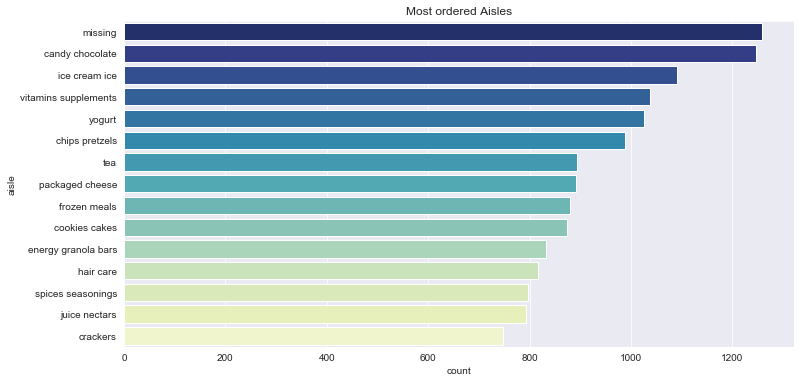

In [297]:
f = plt.figure(figsize=(12, 6))
most_selling_aisles = dep_ais_prd['aisle'].value_counts().nlargest(15)
most_selling_aisles = pd.DataFrame(most_selling_aisles.reset_index())
most_selling_aisles.columns=['aisle','count']
sns.barplot(x='count',y='aisle', palette='YlGnBu_r',data =most_selling_aisles)
plt.title('Most ordered Aisles')
plt.show()

## Mostly ordered Departments

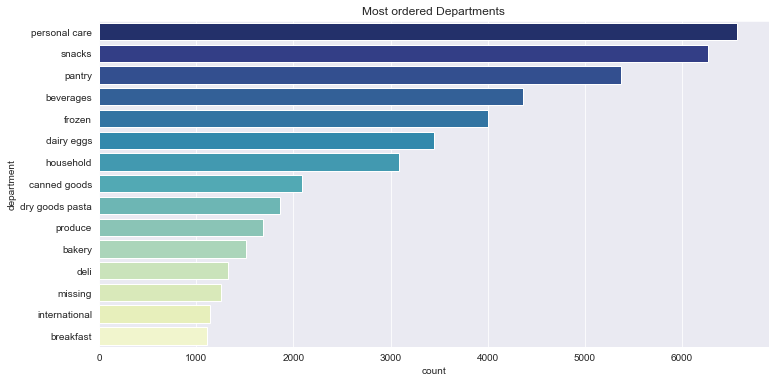

In [298]:
f = plt.figure(figsize=(12,6))
most_selling_dep = dep_ais_prd['department'].value_counts().nlargest(15)
most_selling_dep = pd.DataFrame(most_selling_dep.reset_index())
most_selling_dep.columns=['department','count']
sns.barplot(x='count',y='department', palette='YlGnBu_r',data =most_selling_dep)
plt.title('Most ordered Departments')
plt.show()

## On what days people are ordering more

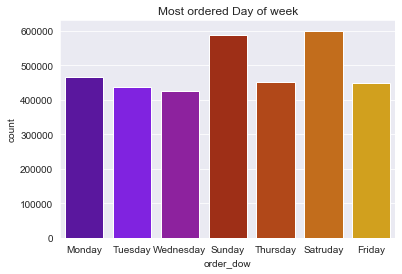

In [321]:
#assumption
orders.order_dow=orders.order_dow.astype('str').replace({'1':'Sunday', '2':'Monday','3':'Tuesday','4':'Wednesday', '5':'Thursday','6':'Friday','0':'Satruday'})
sns.countplot(data=orders.reset_index(), x='order_dow', palette='gnuplot')
plt.title('Most ordered Day of week')
plt.show()

## When most of the orders are getting placed

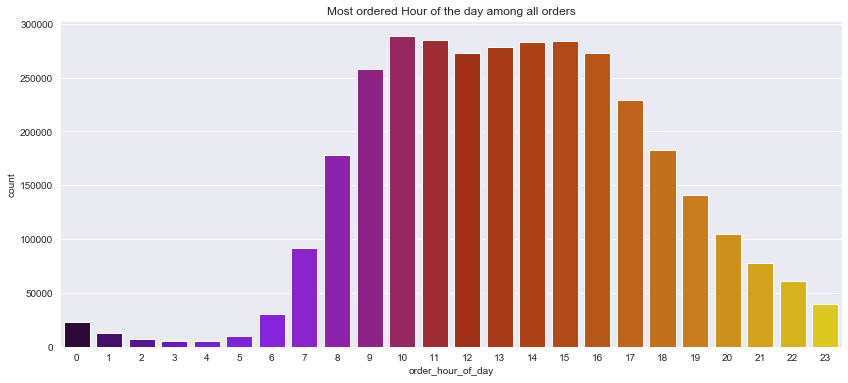

In [300]:
f = plt.figure(figsize=(14, 6))
sns.countplot(data=orders.reset_index(), x='order_hour_of_day', palette='gnuplot')
plt.title('Most ordered Hour of the day among all orders')
plt.show()

## Frequency in ordering

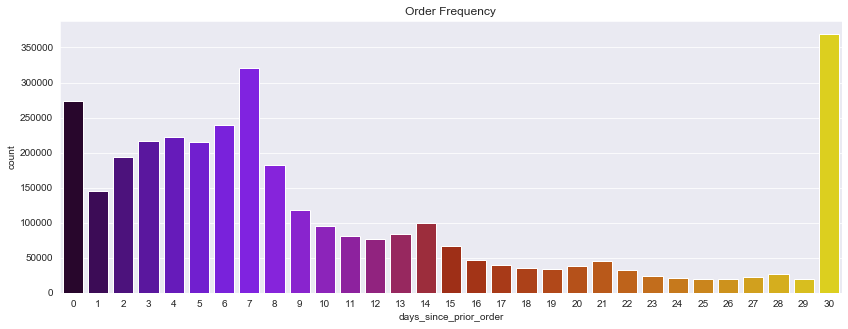

In [301]:
f = plt.figure(figsize=(14, 5))
orders.days_since_prior_order= orders.days_since_prior_order.fillna(0).astype('int')
sns.countplot(data=orders.reset_index(), x='days_since_prior_order', palette='gnuplot')
plt.title('Order Frequency')
plt.show()

#### From this you can say mostly products are bought weekly, and from above graphs, we can say that people are buying mostly on every weekend between 10AM to 4PM

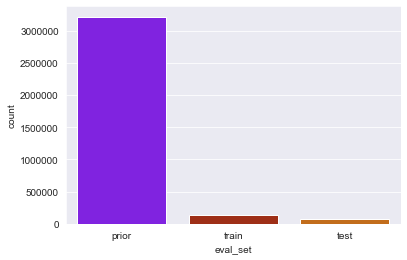

In [238]:
sns.countplot(data=orders.reset_index(), x='eval_set', palette='gnuplot')
plt.show()

## Checking the dataset segregation

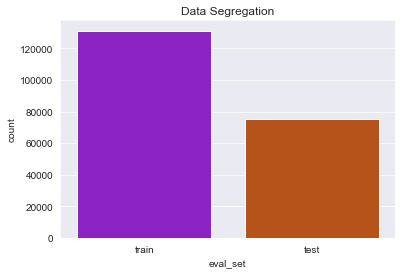

In [302]:
sns.countplot(data=orders.loc[((orders.eval_set=='train') | (orders.eval_set=='test')),].reset_index(), x='eval_set', palette='gnuplot')
plt.title('Data Segregation')
plt.show()

## Products that users bought mostly

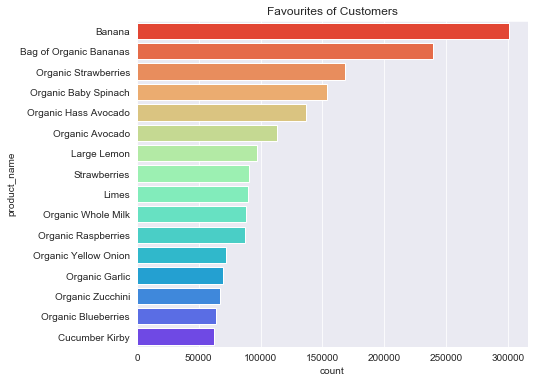

In [304]:
most_bought_products=train_dataset.groupby(by=['product_id'])['num_times_usr_bought_prd'].sum().to_frame('count') .reset_index()
most_bought_products=most_bought_products.sort_values(by=['count'], ascending = False).merge(products[['product_id','product_name']],on='product_id', how='left').reset_index()
#most_bought_products.head(10)
f = plt.figure(figsize=(7, 6))
sns.barplot(x='count',y='product_name', data = most_bought_products.loc[:15,['count','product_name']],palette='rainbow_r')
plt.title('Favourites of Customers')
plt.show()

## Comparing Day, hourly orders

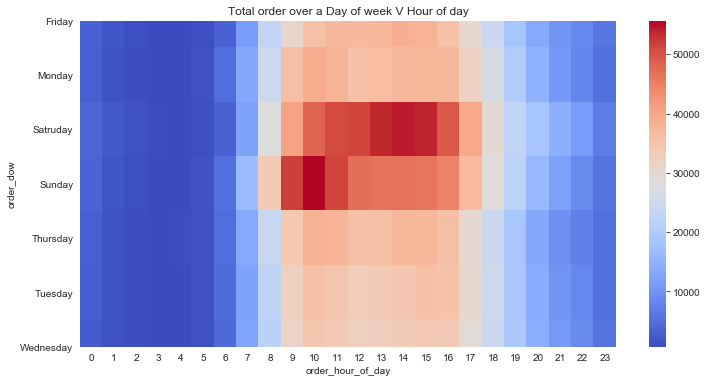

In [328]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].count().reset_index()
grouped_df = grouped_df.pivot('order_dow','order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df, cmap="coolwarm")
plt.yticks(rotation='horizontal')
plt.title("Total order over a Day of week V Hour of day")
plt.show()

## Finding total number of products in an order

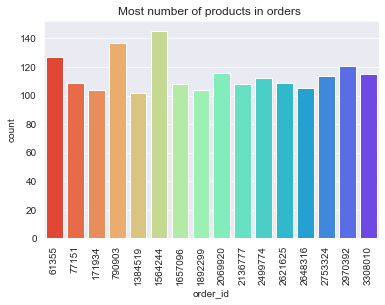

In [346]:
prods_per_order=ord_prd_prior.groupby(by=['order_id'])['add_to_cart_order'].max().to_frame('count') .reset_index()
prods_per_order=prods_per_order.sort_values(by=['count'], ascending = False).reset_index()
sns.barplot(y='count',x='order_id', data = prods_per_order.loc[:15,['count','order_id']],palette='rainbow_r')
plt.title('Most number of products in orders ')
plt.xticks(rotation='vertical')
plt.show()

## Dataset Preparation

In [348]:
import numpy as np
def get_unique_count(x):
    return len(np.unique(x))

ord_prd_prior.groupby(by='order_id')['product_id'].aggregate(get_unique_count)

order_id
2           9
3           8
4          13
5          26
6           3
           ..
3421079     1
3421080     9
3421081     7
3421082     7
3421083    10
Name: product_id, Length: 3214874, dtype: int64

In [350]:
#joining basically inner join aisles and products
ais_prd= pd.merge(aisles,products,on='aisle_id')

#joining with departments
dep_ais_prd=pd.merge(departments,ais_prd,on='department_id')
print(dep_ais_prd.shape)
dep_ais_prd.head()

(49688, 6)


,department_id,department,aisle_id,aisle,product_id,product_name
0,1,frozen,34,frozen meat seafood,118,Ground Turkey Chub
1,1,frozen,34,frozen meat seafood,383,Breaded Chicken Breast Tenders
2,1,frozen,34,frozen meat seafood,402,100% Pure Beef Homestyle Patties
3,1,frozen,34,frozen meat seafood,625,"Chicken Breast Nuggets, Dinosaur Shaped"
4,1,frozen,34,frozen meat seafood,831,All Natural Premium Cornish Hen


In [351]:
#number of missing aisles
len(dep_ais_prd[dep_ais_prd['aisle']=='missing'])

1258

In [48]:
prior_orders = pd.merge(orders, ord_prd_prior, on='order_id', how='inner')
prior_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [353]:
#finding number of prior order by the user
users = prior_orders.groupby(by='user_id')['order_number'].aggregate('max').to_frame('num_of_orders_prior').reset_index()

In [354]:
users.shape

(206209, 2)

In [355]:
users.head()

,user_id,num_of_orders_prior
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


In [356]:
# total number of products bought  per order
total_products_per_order=prior_orders.groupby(by=['user_id','order_id'])['product_id'].aggregate('count').to_frame('tot_prd_per_order').reset_index()

In [357]:
total_products_per_order.head(10)

,user_id,order_id,tot_prd_per_order
0,1,431534,8
1,1,473747,5
2,1,550135,5
3,1,2254736,5
4,1,2295261,6
5,1,2398795,6
6,1,2539329,5
7,1,2550362,9
8,1,3108588,6
9,1,3367565,4


In [358]:
#average number of products ordered by the user
total_avg_products_per_user=total_products_per_order.groupby('user_id')['tot_prd_per_order'].aggregate({'avg_prods': np.mean, 'tot_prods': np.sum}).reset_index()

In [359]:
total_avg_products_per_user.head()

,user_id,avg_prods,tot_prods
0,1,5.900000,59
1,2,13.928571,195
2,3,7.333333,88
3,4,3.600000,18
4,5,9.250000,37


In [360]:
#on what day of week customer ordered more 
max_dow= prior_orders.groupby(['user_id'])['order_dow'].aggregate(lambda x: stats.mode(x)[0]).to_frame('most_dow_per_user').reset_index()
max_dow.head()

,user_id,most_dow_per_user
0,1,Wednesday
1,2,Monday
2,3,Satruday
3,4,Wednesday
4,5,Tuesday


In [361]:
#on what hour of day customer ordered more 
max_hour= prior_orders.groupby(['user_id'])['order_hour_of_day'].aggregate(lambda x: stats.mode(x)[0]).to_frame('most_hour_per_user').reset_index()
max_hour.head()

,user_id,most_hour_per_user
0,1,7
1,2,9
2,3,16
3,4,15
4,5,18


In [362]:
#took nan as 30 as it may be more than one month but for 
prior_orders.days_since_prior_order.fillna(30, inplace=True)

In [363]:
#reorder ratio per user.
reorder = prior_orders.groupby(by='user_id')['reordered'].aggregate('mean').to_frame('reorder_ratio_per_user').reset_index()
reorder.head()

,user_id,reorder_ratio_per_user
0,1,0.694915
1,2,0.476923
2,3,0.625000
3,4,0.055556
4,5,0.378378


In [364]:
users = users.merge(total_avg_products_per_user, on='user_id', how='left')
del total_avg_products_per_user
users = users.merge(max_dow, on='user_id', how='left')
del max_dow
users = users.merge(max_hour, on='user_id', how='left')
del max_hour
users = users.merge(reorder, on='user_id', how='left')
del reorder
users.head()
# aggregated data per user

,user_id,num_of_orders_prior,avg_prods,tot_prods,most_dow_per_user,most_hour_per_user,reorder_ratio_per_user
0,1,10,5.900000,59,Wednesday,7,0.694915
1,2,14,13.928571,195,Monday,9,0.476923
2,3,12,7.333333,88,Satruday,16,0.625000
3,4,5,3.600000,18,Wednesday,15,0.055556
4,5,4,9.250000,37,Tuesday,18,0.378378


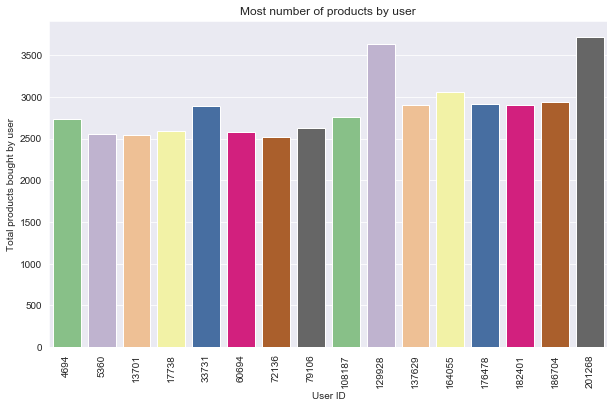

In [392]:
# top purchasers
plt.figure(figsize=(10,6))
prods_per_user=users.sort_values(by=['tot_prods'], ascending = False).reset_index()
sns.barplot(y='tot_prods',x='user_id', data = prods_per_user.loc[:15,['tot_prods','most_dow_per_user','user_id']],palette='Accent')
plt.title('Most number of products by user')
plt.ylabel('Total products bought by user')
plt.xlabel('User ID')
plt.xticks(rotation='vertical')
plt.show()

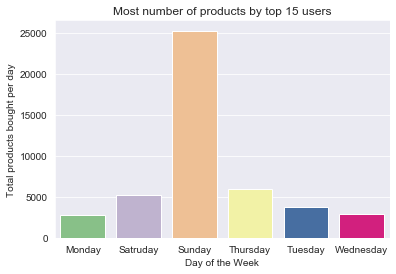

In [393]:
# finding when the top purchasers ordered
prods_per_user=prods_per_user.loc[:15,['tot_prods','most_dow_per_user','user_id']]
prods_per_user=prods_per_user.groupby(by=['most_dow_per_user'])['tot_prods'].sum().to_frame('count').reset_index()
sns.barplot(x='most_dow_per_user',y='count', data = prods_per_user,palette='Accent')
plt.title('Most number of products by top 15 users')
plt.ylabel('Total products bought per day')
plt.xlabel('Day of the Week')
plt.xticks(rotation='horizontal')
plt.show()

In [20]:
users.shape

(206209, 7)

In [395]:
# finding number of times product was purchased
products_count = prior_orders.groupby(by='product_id')['order_id'].aggregate('count').to_frame('num_of_times_per_prod').reset_index()
products_count.head()

,product_id,num_of_times_per_prod
0,1,1852
1,2,90
2,3,277
3,4,329
4,5,15


In [396]:
# finding reorder ratio per product and total number of reorders per product
prod_reorder = prior_orders.groupby(by='product_id')['reordered'].aggregate({'reorder_ratio_per_product':np.mean, 'total_reorder_per_product':np.sum}).reset_index()

prod_reorder.head()

,product_id,reorder_ratio_per_product,total_reorder_per_product
0,1,0.613391,1136
1,2,0.133333,12
2,3,0.732852,203
3,4,0.446809,147
4,5,0.600000,9


In [397]:
# how many products are bought when a product is in the cart
add_cart=prior_orders.groupby(by='product_id')['add_to_cart_order'].aggregate('mean').to_frame('avg_cart_per_product').reset_index()
add_cart.head()

,product_id,avg_cart_per_product
0,1,5.801836
1,2,9.888889
2,3,6.415162
3,4,9.507599
4,5,6.466667


In [398]:
# aggregating all the product wise information
products_info=products_count.merge(prod_reorder,on='product_id', how='left')
products_info=products_info.merge(add_cart,on='product_id', how='left')
products_info.head()

,product_id,num_of_times_per_prod,reorder_ratio_per_product,total_reorder_per_product,avg_cart_per_product
0,1,1852,0.613391,1136,5.801836
1,2,90,0.133333,12,9.888889
2,3,277,0.732852,203,6.415162
3,4,329,0.446809,147,9.507599
4,5,15,0.600000,9,6.466667


##### products_info

In [399]:
# now getting product data per each user
# finding number of times an user bought a product
user_prod = prior_orders.groupby(by=['user_id', 'product_id'])['order_id'].aggregate('count').to_frame('num_times_usr_bought_prd').reset_index()

user_prod.head()

,user_id,product_id,num_times_usr_bought_prd
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [400]:
# how many orders an user placed
tot_ord=prior_orders.groupby(by=['user_id'])['order_number'].aggregate('max').to_frame('tot_ord_per_usr').reset_index()
tot_ord.head()

,user_id,tot_ord_per_usr
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


In [401]:
# when did a user bought a product first
frst_prd_by_usr= prior_orders.groupby(['user_id','product_id'])['order_number'].aggregate('min').to_frame('frst_ord_prd_per_usr').reset_index()
frst_prd_by_usr.head()

,user_id,product_id,frst_ord_prd_per_usr
0,1,196,1
1,1,10258,2
2,1,10326,5
3,1,12427,1
4,1,13032,2


In [29]:
#merging all the data
ord_info = frst_prd_by_usr.merge(tot_ord, on='user_id', how='left')
ord_info.head()

,user_id,product_id,frst_ord_prd_per_usr,tot_ord_per_usr
0,1,196,1,10
1,1,10258,2,10
2,1,10326,5,10
3,1,12427,1,10
4,1,13032,2,10


##### ord_info , user_prod

In [31]:
#calculating max possible orders that an user can buy a product by looking over the first order placedb
ord_info['max_pos_ord'] = 1+ord_info.tot_ord_per_usr - ord_info.frst_ord_prd_per_usr
ord_info.head()

,user_id,product_id,frst_ord_prd_per_usr,tot_ord_per_usr,max_pos_ord
0,1,196,1,10,10
1,1,10258,2,10,9
2,1,10326,5,10,6
3,1,12427,1,10,10
4,1,13032,2,10,9


In [32]:
ord_info=ord_info.merge(user_prod,on=['user_id','product_id'],how='right').reset_index()

In [33]:
ord_info.head()

,index,user_id,product_id,frst_ord_prd_per_usr,tot_ord_per_usr,max_pos_ord,num_times_usr_bought_prd
0,0,1,196,1,10,10,10
1,1,1,10258,2,10,9,9
2,2,1,10326,5,10,6,1
3,3,1,12427,1,10,10,10
4,4,1,13032,2,10,9,3


In [34]:
ord_info['reorder_ratio_puser_pprod'] = ord_info.num_times_usr_bought_prd / ord_info.max_pos_ord
ord_info.head()

,index,user_id,product_id,frst_ord_prd_per_usr,tot_ord_per_usr,max_pos_ord,num_times_usr_bought_prd,reorder_ratio_puser_pprod
0,0,1,196,1,10,10,10,1.000000
1,1,1,10258,2,10,9,9,1.000000
2,2,1,10326,5,10,6,1,0.166667
3,3,1,12427,1,10,10,10,1.000000
4,4,1,13032,2,10,9,3,0.333333


In [35]:
# dropping unwanted columns
ord_info.drop(['num_times_usr_bought_prd', 'tot_ord_per_usr', 'frst_ord_prd_per_usr', 'max_pos_ord'], axis=1, inplace=True)

In [37]:
ord_info.drop(['index'],axis=1, inplace=True)

In [38]:
ord_info.head()

,user_id,product_id,reorder_ratio_puser_pprod
0,1,196,1.000000
1,1,10258,1.000000
2,1,10326,0.166667
3,1,12427,1.000000
4,1,13032,0.333333


In [40]:
# 
user_prod=user_prod.merge(ord_info, on=['user_id','product_id'])

In [41]:
user_prod.head()

,user_id,product_id,num_times_usr_bought_prd,reorder_ratio_puser_pprod
0,1,196,10,1.000000
1,1,10258,9,1.000000
2,1,10326,1,0.166667
3,1,12427,10,1.000000
4,1,13032,3,0.333333


In [43]:
# reversing order number to find out recent orders data
prior_orders['order_number_1'] = prior_orders.groupby(by=['user_id'])['order_number'].transform(max) - prior_orders.order_number + 1
prior_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_1
0,2539329,1,prior,1,2,8,30.0,196,1,0,10
1,2539329,1,prior,1,2,8,30.0,14084,2,0,10
2,2539329,1,prior,1,2,8,30.0,12427,3,0,10
3,2539329,1,prior,1,2,8,30.0,26088,4,0,10
4,2539329,1,prior,1,2,8,30.0,26405,5,0,10


In [44]:
# finding the recent 6 orders by an user
recent=prior_orders[prior_orders.order_number_1 <7]
recent.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_1
21,431534,1,prior,5,4,15,28.0,196,1,1,6
22,431534,1,prior,5,4,15,28.0,12427,2,1,6
23,431534,1,prior,5,4,15,28.0,10258,3,1,6
24,431534,1,prior,5,4,15,28.0,25133,4,1,6
25,431534,1,prior,5,4,15,28.0,10326,5,0,6


In [45]:
# finding total number of reorders in the recent order
recent = recent.groupby(by=['user_id', 'product_id'])['order_id'].aggregate('count').to_frame('recent_orders_count').reset_index()
recent.head()

,user_id,product_id,recent_orders_count
0,1,196,6
1,1,10258,6
2,1,10326,1
3,1,12427,6
4,1,13032,2


In [46]:
# like reorder ratio finding recent reorders ration per user per product
recent['recent_orders_ratio']=recent.recent_orders_count/6.0
recent.head()

,user_id,product_id,recent_orders_count,recent_orders_ratio
0,1,196,6,1.000000
1,1,10258,6,1.000000
2,1,10326,1,0.166667
3,1,12427,6,1.000000
4,1,13032,2,0.333333


In [47]:
# merging all the user and products related data
user_prod = user_prod.merge(recent, on=['user_id', 'product_id'], how='left')
user_prod.head()

,user_id,product_id,num_times_usr_bought_prd,reorder_ratio_puser_pprod,recent_orders_count,recent_orders_ratio
0,1,196,10,1.000000,6.0,1.000000
1,1,10258,9,1.000000,6.0,1.000000
2,1,10326,1,0.166667,1.0,0.166667
3,1,12427,10,1.000000,6.0,1.000000
4,1,13032,3,0.333333,2.0,0.333333


In [48]:
# finding null values
user_prod.isna().sum()

user_id                            0
product_id                         0
num_times_usr_bought_prd           0
reorder_ratio_puser_pprod          0
recent_orders_count          5926214
recent_orders_ratio          5926214
dtype: int64

In [49]:
# filling nulls with zero
user_prod.fillna(0,inplace=True)
user_prod.isna().sum()

user_id                      0
product_id                   0
num_times_usr_bought_prd     0
reorder_ratio_puser_pprod    0
recent_orders_count          0
recent_orders_ratio          0
dtype: int64

In [50]:
# merging individual users, products and both data into one single dataset
dataset = user_prod.merge(users, on='user_id', how='left')
dataset = dataset.merge(products_info, on='product_id', how='left')
dataset.head()

,user_id,product_id,num_times_usr_bought_prd,reorder_ratio_puser_pprod,recent_orders_count,recent_orders_ratio,num_of_orders_prior,avg_prods,tot_prods,most_dow_per_user,most_hour_per_user,reorder_ratio_per_user,num_of_times_per_prod,reorder_ratio_per_product,total_reorder_per_product,avg_cart_per_product
0,1,196,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,35791,0.776480,27791,3.721774
1,1,10258,9,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,1946,0.713772,1389,4.277492
2,1,10326,1,0.166667,1.0,0.166667,10,5.9,59,4,7,0.694915,5526,0.652009,3603,4.191097
3,1,12427,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,6476,0.740735,4797,4.760037
4,1,13032,3,0.333333,2.0,0.333333,10,5.9,59,4,7,0.694915,3751,0.657158,2465,5.622767


In [101]:
# converting dataset to csv for fast loading
#dataset.to_csv('data/dataset.csv', index=False, header=True)

In [6]:
dataset=pd.read_csv('data/dataset.csv')

In [7]:
dataset.head()

,user_id,product_id,num_times_usr_bought_prd,reorder_ratio_puser_pprod,recent_orders_count,recent_orders_ratio,num_of_orders_prior,avg_prods,tot_prods,most_dow_per_user,most_hour_per_user,reorder_ratio_per_user,num_of_times_per_prod,reorder_ratio_per_product,total_reorder_per_product,avg_cart_per_product
0,1,196,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,35791,0.776480,27791,3.721774
1,1,10258,9,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,1946,0.713772,1389,4.277492
2,1,10326,1,0.166667,1.0,0.166667,10,5.9,59,4,7,0.694915,5526,0.652009,3603,4.191097
3,1,12427,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,6476,0.740735,4797,4.760037
4,1,13032,3,0.333333,2.0,0.333333,10,5.9,59,4,7,0.694915,3751,0.657158,2465,5.622767


In [8]:
orders['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [53]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [50]:
# filtering only training and testing data from orders dataframe inorder to merge with dataset
orders_train_test = orders.loc[((orders.eval_set == 'train') | (orders.eval_set == 'test')), ['user_id', 'eval_set', 'order_id']]
orders_train_test.head()

,user_id,eval_set,order_id
10,1,train,1187899
25,2,train,1492625
38,3,test,2774568
44,4,test,329954
49,5,train,2196797


In [54]:
orders_train_test.user_id.nunique(),orders_train_test.order_id.nunique()

(206209, 206209)

In [10]:
# merging dataset with orders data above will get to know which row is training and which is testing set
dataset = dataset.merge(orders_train_test, on='user_id',how='left')
dataset.head()

,user_id,product_id,num_times_usr_bought_prd,reorder_ratio_puser_pprod,recent_orders_count,recent_orders_ratio,num_of_orders_prior,avg_prods,tot_prods,most_dow_per_user,most_hour_per_user,reorder_ratio_per_user,num_of_times_per_prod,reorder_ratio_per_product,total_reorder_per_product,avg_cart_per_product,eval_set,order_id
0,1,196,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,35791,0.776480,27791,3.721774,train,1187899
1,1,10258,9,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,1946,0.713772,1389,4.277492,train,1187899
2,1,10326,1,0.166667,1.0,0.166667,10,5.9,59,4,7,0.694915,5526,0.652009,3603,4.191097,train,1187899
3,1,12427,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,6476,0.740735,4797,4.760037,train,1187899
4,1,13032,3,0.333333,2.0,0.333333,10,5.9,59,4,7,0.694915,3751,0.657158,2465,5.622767,train,1187899


In [12]:
# filtering training dataset
train_dataset = dataset[dataset.eval_set=='train']
train_dataset = train_dataset.merge(ord_prd_train[['order_id','product_id','reordered']], on =['order_id','product_id'], how='left').reset_index()
train_dataset.head()

,index,user_id,product_id,num_times_usr_bought_prd,reorder_ratio_puser_pprod,recent_orders_count,recent_orders_ratio,num_of_orders_prior,avg_prods,tot_prods,most_dow_per_user,most_hour_per_user,reorder_ratio_per_user,num_of_times_per_prod,reorder_ratio_per_product,total_reorder_per_product,avg_cart_per_product,eval_set,order_id,reordered
0,0,1,196,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,35791,0.776480,27791,3.721774,train,1187899,1.0
1,1,1,10258,9,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,1946,0.713772,1389,4.277492,train,1187899,1.0
2,2,1,10326,1,0.166667,1.0,0.166667,10,5.9,59,4,7,0.694915,5526,0.652009,3603,4.191097,train,1187899,NaN
3,3,1,12427,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,6476,0.740735,4797,4.760037,train,1187899,NaN
4,4,1,13032,3,0.333333,2.0,0.333333,10,5.9,59,4,7,0.694915,3751,0.657158,2465,5.622767,train,1187899,1.0


In [13]:
train_dataset.drop('index',axis=1,inplace=True)
train_dataset.head()

,user_id,product_id,num_times_usr_bought_prd,reorder_ratio_puser_pprod,recent_orders_count,recent_orders_ratio,num_of_orders_prior,avg_prods,tot_prods,most_dow_per_user,most_hour_per_user,reorder_ratio_per_user,num_of_times_per_prod,reorder_ratio_per_product,total_reorder_per_product,avg_cart_per_product,eval_set,order_id,reordered
0,1,196,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,35791,0.776480,27791,3.721774,train,1187899,1.0
1,1,10258,9,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,1946,0.713772,1389,4.277492,train,1187899,1.0
2,1,10326,1,0.166667,1.0,0.166667,10,5.9,59,4,7,0.694915,5526,0.652009,3603,4.191097,train,1187899,NaN
3,1,12427,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,6476,0.740735,4797,4.760037,train,1187899,NaN
4,1,13032,3,0.333333,2.0,0.333333,10,5.9,59,4,7,0.694915,3751,0.657158,2465,5.622767,train,1187899,1.0


In [14]:
# chceking for nulls
train_dataset.isna().sum()

user_id                            0
product_id                         0
num_times_usr_bought_prd           0
reorder_ratio_puser_pprod          0
recent_orders_count                0
recent_orders_ratio                0
num_of_orders_prior                0
avg_prods                          0
tot_prods                          0
most_dow_per_user                  0
most_hour_per_user                 0
reorder_ratio_per_user             0
num_of_times_per_prod              0
reorder_ratio_per_product          0
total_reorder_per_product          0
avg_cart_per_product               0
eval_set                           0
order_id                           0
reordered                    7645837
dtype: int64

In [17]:
# as the nulls are only present in reordered, that means they are not reordered. So, it is replaced by zero
train_dataset.fillna(0, inplace=True)
train_dataset.head()

,user_id,product_id,num_times_usr_bought_prd,reorder_ratio_puser_pprod,recent_orders_count,recent_orders_ratio,num_of_orders_prior,avg_prods,tot_prods,most_dow_per_user,most_hour_per_user,reorder_ratio_per_user,num_of_times_per_prod,reorder_ratio_per_product,total_reorder_per_product,avg_cart_per_product,reordered
0,1,196,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,35791,0.776480,27791,3.721774,1.0
1,1,10258,9,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,1946,0.713772,1389,4.277492,1.0
2,1,10326,1,0.166667,1.0,0.166667,10,5.9,59,4,7,0.694915,5526,0.652009,3603,4.191097,0.0
3,1,12427,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,6476,0.740735,4797,4.760037,0.0
4,1,13032,3,0.333333,2.0,0.333333,10,5.9,59,4,7,0.694915,3751,0.657158,2465,5.622767,1.0


In [18]:
# dropping unueful order_id, eval_set columns
train_dataset.drop(['order_id','eval_set'], axis=1, inplace=True)

KeyError: "['order_id' 'eval_set'] not found in axis"

In [19]:
train_dataset.head()

,user_id,product_id,num_times_usr_bought_prd,reorder_ratio_puser_pprod,recent_orders_count,recent_orders_ratio,num_of_orders_prior,avg_prods,tot_prods,most_dow_per_user,most_hour_per_user,reorder_ratio_per_user,num_of_times_per_prod,reorder_ratio_per_product,total_reorder_per_product,avg_cart_per_product,reordered
0,1,196,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,35791,0.776480,27791,3.721774,1.0
1,1,10258,9,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,1946,0.713772,1389,4.277492,1.0
2,1,10326,1,0.166667,1.0,0.166667,10,5.9,59,4,7,0.694915,5526,0.652009,3603,4.191097,0.0
3,1,12427,10,1.000000,6.0,1.000000,10,5.9,59,4,7,0.694915,6476,0.740735,4797,4.760037,0.0
4,1,13032,3,0.333333,2.0,0.333333,10,5.9,59,4,7,0.694915,3751,0.657158,2465,5.622767,1.0


In [25]:
#train_dataset.to_csv('data/train_dataset.csv',header=True, index=False)

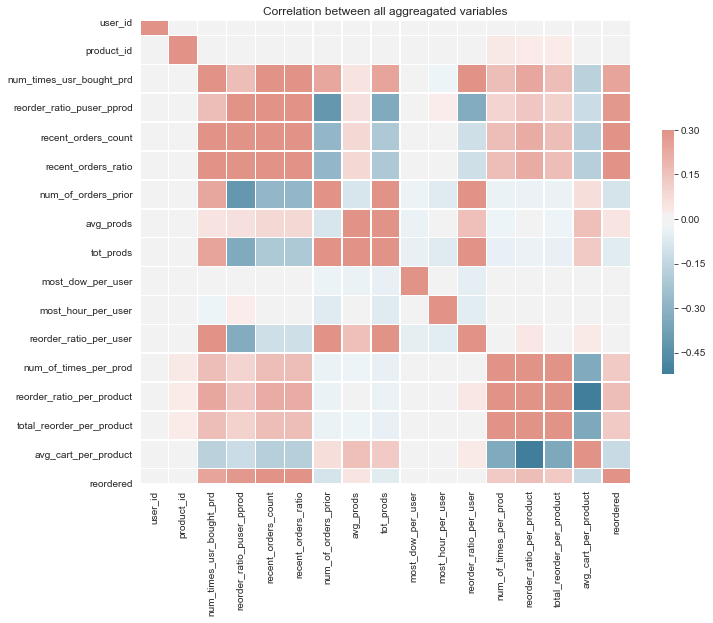

In [407]:
# finding the correlation between variables
corr = train_dataset.corr()

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 16, as_cmap=True)

#drawing heatmap
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation between all aggreagated variables')
plt.show()

#### train_dataset

In [21]:
# making a test_dataset
test_dataset = dataset[dataset.eval_set=='test']
test_dataset.shape

(4833292, 18)

In [22]:
test_dataset.drop(['eval_set','order_id'],axis=1, inplace=True)
test_dataset.head()

,user_id,product_id,num_times_usr_bought_prd,reorder_ratio_puser_pprod,recent_orders_count,recent_orders_ratio,num_of_orders_prior,avg_prods,tot_prods,most_dow_per_user,most_hour_per_user,reorder_ratio_per_user,num_of_times_per_prod,reorder_ratio_per_product,total_reorder_per_product,avg_cart_per_product
120,3,248,1,0.090909,0.0,0.000000,12,7.333333,88,0,16,0.625,6371,0.400251,2550,10.620782
121,3,1005,1,0.333333,1.0,0.166667,12,7.333333,88,0,16,0.625,463,0.440605,204,9.498920
122,3,1819,3,0.333333,1.0,0.166667,12,7.333333,88,0,16,0.625,2424,0.492162,1193,9.287541
123,3,7503,1,0.100000,0.0,0.000000,12,7.333333,88,0,16,0.625,12474,0.553551,6905,9.547379
124,3,8021,1,0.090909,0.0,0.000000,12,7.333333,88,0,16,0.625,27864,0.591157,16472,8.822854


In [23]:
train_dataset.shape,test_dataset.shape

((8474661, 17), (4833292, 16))

In [24]:
#test_dataset.to_csv('data/test_dataset.csv',header=True, index=False)

# test_dataset

In [2]:
# import zipfile
# import glob
# import pandas as pd
# import numpy as np
# from scipy import stats

# import warnings
# warnings.filterwarnings("ignore")

# train_dataset = pd.read_csv('data/train_dataset.csv')
# test_dataset = pd.read_csv('data/test_dataset.csv')

In [3]:
#importing the packages.
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import f1_score, classification_report,confusion_matrix,accuracy_score

from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from timeit import default_timer as timer

In [4]:
X = train_dataset.drop('reordered', axis=1)
y = train_dataset.reordered

# splitting training data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
train_dataset['reordered'].unique()

array([1., 0.])

In [7]:
# number of columns including label
len(train_dataset.columns)

17

In [75]:
# feature selection using chi square test
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X.to_numpy(),y.to_numpy())
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                     features         Score
12      num_of_times_per_prod  1.893537e+10
14  total_reorder_per_product  1.734783e+10
8                   tot_prods  9.040642e+06
2    num_times_usr_bought_prd  2.703977e+06
4         recent_orders_count  1.723052e+06
6         num_of_orders_prior  1.413832e+06
1                  product_id  5.218003e+05
5         recent_orders_ratio  2.871754e+05
3   reorder_ratio_puser_pprod  1.799761e+05
7                   avg_prods  6.359589e+04
0                     user_id  5.358281e+04
15       avg_cart_per_product  3.970959e+04
13  reorder_ratio_per_product  1.171868e+04
9           most_dow_per_user  1.705163e+02
10         most_hour_per_user  5.586578e+01


In [408]:
# finding the top 12 features using Recursive Feature Elimination 
svm = LinearSVC() # creating model
recurFS = RFE(svm, 12)

recurFS = recurFS.fit(X_test.loc[:300000,],np.ravel(y_test.loc[:300000,],order='C')) #fitting model

print(recurFS.support_)#gives the result of attributes that are used to find the fake accounts
print(recurFS.ranking_)#gives the rank for the attributes

[False False  True  True  True  True  True  True  True  True  True  True
 False  True False  True]
[4 5 1 1 1 1 1 1 1 1 1 1 2 1 3 1]


In [413]:
# finding which columns are useful
list(zip(X_test.columns,recurFS.ranking_))

[('user_id', 4),
 ('product_id', 5),
 ('num_times_usr_bought_prd', 1),
 ('reorder_ratio_puser_pprod', 1),
 ('recent_orders_count', 1),
 ('recent_orders_ratio', 1),
 ('num_of_orders_prior', 1),
 ('avg_prods', 1),
 ('tot_prods', 1),
 ('most_dow_per_user', 1),
 ('most_hour_per_user', 1),
 ('reorder_ratio_per_user', 1),
 ('num_of_times_per_prod', 2),
 ('reorder_ratio_per_product', 1),
 ('total_reorder_per_product', 3),
 ('avg_cart_per_product', 1)]

## Naive Bayes

In [56]:
nb=GaussianNB()
nb.fit(X_train,np.ravel(y_train,order='C'))
Gaussian_pred=nb.predict(X_test)
accuracy_Guassian =  accuracy_score(y_test, Gaussian_pred) * 100
print(Gaussian_pred)
print("The accuracy using Naive Bayes is {:.2f}%".format(accuracy_Guassian))
print(confusion_matrix(Gaussian_pred, y_test))

[1. 0. 0. ... 0. 0. 0.]
The accuracy using Naive Bayes is 88.43%
[[2421696  222663]
 [ 100976   51304]]


## KNN Classification

In [5]:
knn=KNeighborsClassifier()
knn.fit(X_train,np.ravel(y_train,order='C'))
knn_pred=knn.predict(X_test)
accuracy_knn =  accuracy_score(y_test, knn_pred) * 100
print(knn_pred)
print("The accuracy using KNN is {:.2f}%".format(accuracy_knn))
print(confusion_matrix(knn_pred, y_test))

[0. 0. 0. ... 0. 0. 0.]
The accuracy using KNN is 89.29%
[[2488627  265481]
 [  34045    8486]]


In [6]:
knn.fit(X,np.ravel(y,order='C'))
y_pred_test_knn =knn.predict(test_dataset)
print(y_pred_test_knn)


[0. 0. 0. ... 0. 0. 0.]


In [19]:
test_dataset['reordered_pred']= y_pred_test_knn.astype('int')
test_dataset.head()

,user_id,product_id,num_times_usr_bought_prd,reorder_ratio_puser_pprod,recent_orders_count,recent_orders_ratio,num_of_orders_prior,avg_prods,tot_prods,most_dow_per_user,most_hour_per_user,reorder_ratio_per_user,num_of_times_per_prod,reorder_ratio_per_product,total_reorder_per_product,avg_cart_per_product,reordered_pred
0,3,248,1,0.090909,0.0,0.000000,12,7.333333,88,0,16,0.625,6371,0.400251,2550,10.620782,0
1,3,1005,1,0.333333,1.0,0.166667,12,7.333333,88,0,16,0.625,463,0.440605,204,9.498920,0
2,3,1819,3,0.333333,1.0,0.166667,12,7.333333,88,0,16,0.625,2424,0.492162,1193,9.287541,0
3,3,7503,1,0.100000,0.0,0.000000,12,7.333333,88,0,16,0.625,12474,0.553551,6905,9.547379,0
4,3,8021,1,0.090909,0.0,0.000000,12,7.333333,88,0,16,0.625,27864,0.591157,16472,8.822854,0


In [66]:
output = test_dataset[['product_id','user_id','reordered_pred']].reset_index()

output.drop('index',axis=1, inplace=True)

test_orders = orders.loc[orders.eval_set == 'test', ['user_id', 'order_id']]
output = pd.merge(output, test_orders, on='user_id', how='left')

output_f=output.merge(products[['product_id','product_name']], on='product_id', how='left')

output_f = output_f[output_f.reordered_pred==1].reset_index()

output_f = output_f[['order_id', 'product_name']]
output_f.head()

,order_id,product_name
0,1356845,Organic Yellow Onion
1,2161313,Trail Mix
2,1416320,Organic Thompson Seedless Raisins
3,1416320,Organic Strawberries
4,1416320,Organic Cucumber


### LGBM classification

In [439]:
#for 14 independent features
X_test14=X_test.loc[:,[True, True  ,True,  True , True,True  ,True  ,True , True,  True,  True,  True, False , True ,False , True]]
X_train14=X_train.loc[:,[True, True  ,True,  True , True,True  ,True  ,True , True,  True,  True,  True, False , True ,False , True]]
lgbm14 = lgb.LGBMClassifier(objective='binary', num_leaves=100, max_depth=-1)
#fitting the model.
lgbm14.fit(X_train14, y_train)

#prediction
lgbm_y_pred14 = (lgbm14.predict_proba(X_test14)[:, 1] >= 0.2).astype('int') #setting a threshold.

#Evaluation.
print('F1 Score: {}'.format(f1_score(lgbm_y_pred14, y_test)))
print(classification_report(lgbm_y_pred14, y_test))
print(confusion_matrix(lgbm_y_pred14, y_test))

F1 Score: 0.4311956326837508
              precision    recall  f1-score   support

           0       0.90      0.95      0.92   2406949
           1       0.52      0.37      0.43    389690

    accuracy                           0.87   2796639
   macro avg       0.71      0.66      0.68   2796639
weighted avg       0.85      0.87      0.85   2796639

[[2276065  130884]
 [ 246607  143083]]


In [49]:
# with all features
lgbm = lgb.LGBMClassifier(objective='binary', num_leaves=96, max_depth=10)
#fitting the model.
lgbm.fit(X_train, y_train)

#prediction
lgbm_y_pred = (lgbm.predict_proba(X_test)[:, 1] >= 0.2).astype('int') #setting a threshold.

#Evaluation.
print('F1 Score: {}'.format(f1_score(lgbm_y_pred, y_test)))
print(classification_report(lgbm_y_pred, y_test))
print(confusion_matrix(lgbm_y_pred, y_test))

F1 Score: 0.43109144062197363
              precision    recall  f1-score   support

           0       0.90      0.95      0.92   2407684
           1       0.52      0.37      0.43    388955

    accuracy                           0.87   2796639
   macro avg       0.71      0.66      0.68   2796639
weighted avg       0.85      0.87      0.86   2796639

[[2276607  131077]
 [ 246065  142890]]


In [54]:
accuracy_LGBM =  accuracy_score(y_test, y_pred) * 100
print('The accuracy for LGBM is {:.2f}%'.format(accuracy_LGBM))

The accuracy for LGBM is 86.51%


# Logistic Regression

In [5]:
clf_t = LogisticRegression(random_state=0).fit(X_train,np.ravel(y_train,order='C'))
log_pred_t=clf_t.predict(X_test)
accuracy_log_t =  accuracy_score(y_test, log_pred_t) * 100
print(log_pred_t)
print("The accuracy using Log is {:.2f}%".format(accuracy_log_t))
print(confusion_matrix(log_pred_t, y_test))

[0. 0. 0. ... 0. 0. 0.]
The accuracy using Log is 90.29%
[[2519575  268506]
 [   3097    5461]]


In [6]:
#now fitting on whole dataset
clf = LogisticRegression(random_state=0).fit(X,np.ravel(y,order='C'))
log_pred=clf.predict(test_dataset)

print(log_pred)


[0. 0. 0. ... 0. 0. 0.]


In [8]:
len(log_pred[log_pred==0])

4763749

In [9]:
test_dataset.head()

,user_id,product_id,num_times_usr_bought_prd,reorder_ratio_puser_pprod,recent_orders_count,recent_orders_ratio,num_of_orders_prior,avg_prods,tot_prods,most_dow_per_user,most_hour_per_user,reorder_ratio_per_user,num_of_times_per_prod,reorder_ratio_per_product,total_reorder_per_product,avg_cart_per_product
0,3,248,1,0.090909,0.0,0.000000,12,7.333333,88,0,16,0.625,6371,0.400251,2550,10.620782
1,3,1005,1,0.333333,1.0,0.166667,12,7.333333,88,0,16,0.625,463,0.440605,204,9.498920
2,3,1819,3,0.333333,1.0,0.166667,12,7.333333,88,0,16,0.625,2424,0.492162,1193,9.287541
3,3,7503,1,0.100000,0.0,0.000000,12,7.333333,88,0,16,0.625,12474,0.553551,6905,9.547379
4,3,8021,1,0.090909,0.0,0.000000,12,7.333333,88,0,16,0.625,27864,0.591157,16472,8.822854


In [60]:
test_dataset['reordered_pred']= log_pred.astype('int')
output = test_dataset[['product_id','user_id','most_dow_per_user','most_hour_per_user','reordered_pred']].reset_index()
output.drop('index',axis=1, inplace=True)
test_orders = orders.loc[orders.eval_set == 'test', ['user_id', 'order_id']]
output = pd.merge(output, test_orders, on='user_id', how='left')
output_f=output.merge(products[['product_id','product_name']], on='product_id', how='left')
output_f = output_f[output_f.reordered_pred==1].reset_index()
output_f = output_f[['order_id', 'product_name','most_dow_per_user','most_hour_per_user']]
output_f.head()

,order_id,product_name,most_dow_per_user,most_hour_per_user
0,2774568,Organic Baby Spinach,0,16
1,2774568,Vanilla Unsweetened Almond Milk,0,16
2,2774568,Organic Avocado,0,16
3,1320132,1500 Pale Ale,0,17
4,2431024,Small Hass Avocado,0,9


In [39]:
final=output_f.groupby(['product_name'])['order_id'].count().to_frame('count').reset_index() \
.sort_values(by='count', ascending=False).reset_index()

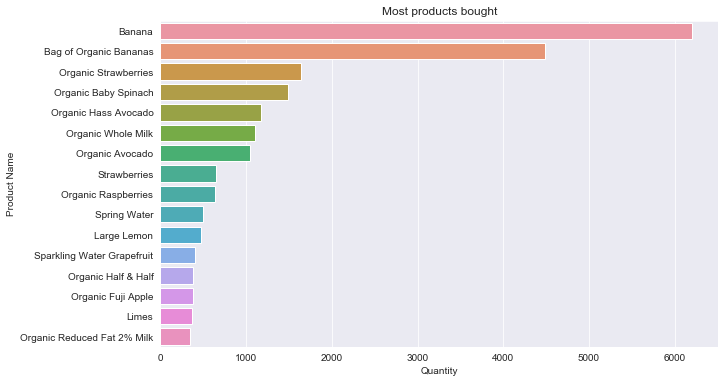

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='product_name', data=final.loc[:15,])
plt.title('Most products bought')
plt.xlabel('Quantity')
plt.ylabel('Product Name')
plt.show()

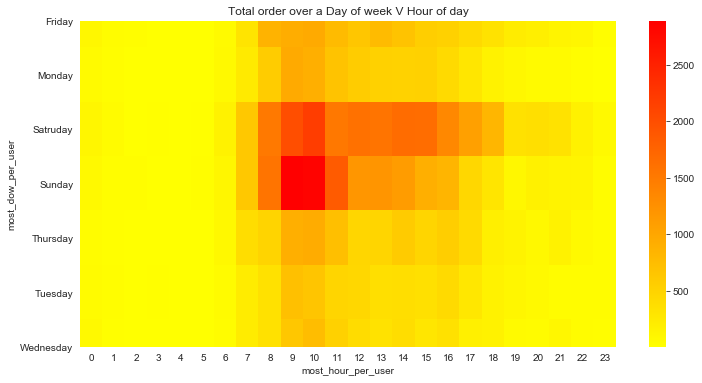

In [66]:
output_f2 = output_f.groupby(by=['most_dow_per_user','most_hour_per_user'])['order_id'].count().reset_index()
output_f2.most_dow_per_user=output_f2.most_dow_per_user.astype('str').replace({'1':'Sunday', '2':'Monday','3':'Tuesday','4':'Wednesday', '5':'Thursday','6':'Friday','0':'Satruday'})

output_f2 = output_f2.pivot('most_dow_per_user','most_hour_per_user', 'order_id')

plt.figure(figsize=(12,6))
sns.heatmap(output_f2, cmap="autumn_r")
plt.yticks(rotation='horizontal')
plt.title("Total order over a Day of week V Hour of day")
plt.show()

## Logistic Reg with 14 features

In [77]:
X_test14=X_test.loc[:,[True, True  ,True,  True , True,True  ,True  ,True , True,  True,  True,  True, False , True ,False , True]]
X_train14=X_train.loc[:,[True, True  ,True,  True , True,True  ,True  ,True , True,  True,  True,  True, False , True ,False , True]]

clf_14_t = LogisticRegression(random_state=0).fit(X_train14,np.ravel(y_train,order='C'))
log_pred_14_t=clf_14_t.predict(X_test14)
accuracy_log_14_t =  accuracy_score(y_test, log_pred_14_t) * 100
print(log_pred_14_t)
print("The accuracy using Log is {:.2f}%".format(accuracy_log_14_t))
print(confusion_matrix(log_pred_14_t, y_test))

[1. 0. 0. ... 0. 0. 0.]
The accuracy using Log is 90.47%
[[2501705  245617]
 [  20967   28350]]


In [71]:
#now fitting on whole dataset
X_14=X.loc[:,[True, True  ,True,  True , True,True  ,True  ,True , True,  True,  True,  True, False , True ,False , True]]
test_dataset_14=test_dataset.loc[:,[True, True  ,True,  True , True,True  ,True  ,True , True,  True,  True,  True, False , True ,False , True, False]]

clf_14 = LogisticRegression(random_state=0).fit(X_14,np.ravel(y,order='C'))
log_pred_14=clf_14.predict(test_dataset_14)

print(log_pred_14)


[0. 0. 0. ... 0. 0. 0.]


In [8]:
len(log_pred[log_pred==0])

4763749

In [72]:
test_dataset_14.head()

,user_id,product_id,num_times_usr_bought_prd,reorder_ratio_puser_pprod,recent_orders_count,recent_orders_ratio,num_of_orders_prior,avg_prods,tot_prods,most_dow_per_user,most_hour_per_user,reorder_ratio_per_user,reorder_ratio_per_product,avg_cart_per_product
0,3,248,1,0.090909,0.0,0.000000,12,7.333333,88,0,16,0.625,0.400251,10.620782
1,3,1005,1,0.333333,1.0,0.166667,12,7.333333,88,0,16,0.625,0.440605,9.498920
2,3,1819,3,0.333333,1.0,0.166667,12,7.333333,88,0,16,0.625,0.492162,9.287541
3,3,7503,1,0.100000,0.0,0.000000,12,7.333333,88,0,16,0.625,0.553551,9.547379
4,3,8021,1,0.090909,0.0,0.000000,12,7.333333,88,0,16,0.625,0.591157,8.822854


In [73]:
test_dataset_14['reordered_pred']= log_pred_14.astype('int')
output = test_dataset_14[['product_id','user_id','most_dow_per_user','most_hour_per_user','reordered_pred']].reset_index()
output.drop('index',axis=1, inplace=True)
test_orders = orders.loc[orders.eval_set == 'test', ['user_id', 'order_id']]
output = pd.merge(output, test_orders, on='user_id', how='left')
output_f=output.merge(products[['product_id','product_name']], on='product_id', how='left')
output_f = output_f[output_f.reordered_pred==1].reset_index()
output_f = output_f[['order_id', 'product_name','most_dow_per_user','most_hour_per_user']]
output_f.head()

,order_id,product_name,most_dow_per_user,most_hour_per_user
0,2774568,Vanilla Unsweetened Almond Milk,0,16
1,2774568,Organic Avocado,0,16
2,2161313,Dried Mangos,1,11
3,2161313,Original Beef Jerky,1,11
4,2161313,Coconut Water,1,11


In [74]:
final=output_f.groupby(['product_name'])['order_id'].count().to_frame('count').reset_index() \
.sort_values(by='count', ascending=False).reset_index()

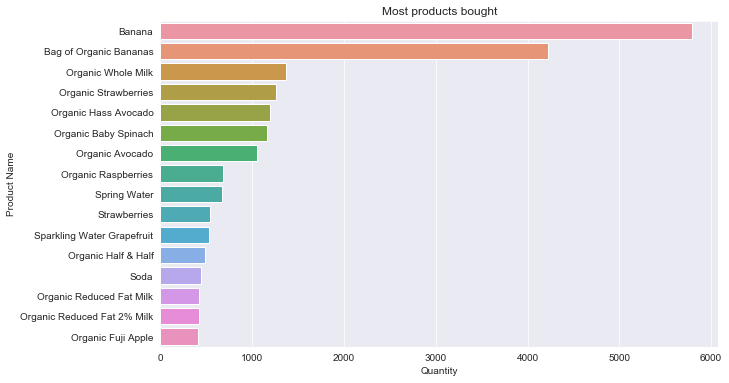

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='product_name', data=final.loc[:15,])
plt.title('Most products bought')
plt.xlabel('Quantity')
plt.ylabel('Product Name')
plt.show()

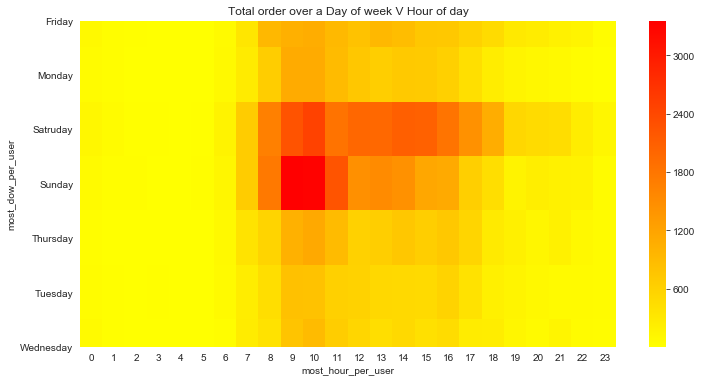

In [76]:
output_f2 = output_f.groupby(by=['most_dow_per_user','most_hour_per_user'])['order_id'].count().reset_index()
output_f2.most_dow_per_user=output_f2.most_dow_per_user.astype('str').replace({'1':'Sunday', '2':'Monday','3':'Tuesday','4':'Wednesday', '5':'Thursday','6':'Friday','0':'Satruday'})

output_f2 = output_f2.pivot('most_dow_per_user','most_hour_per_user', 'order_id')

plt.figure(figsize=(12,6))
sns.heatmap(output_f2, cmap="autumn_r")
plt.yticks(rotation='horizontal')
plt.title("Total order over a Day of week V Hour of day")
plt.show()

## Best accuracy was achieved using logistic regression but all the models looks simlar

## People are buying fruits more which indicates that people trying to lead health life style and those are to be kept in large stocks

In [96]:
import re
print(re.search(r'...$', 'sailesh').group(0))

esh
